In [731]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

# **DATA COLLECTION**

In [732]:
df= pd.read_excel(r"Flight_price_data.xlsx")

# **UNDERSTANDING OF DATA**

In [733]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [734]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [735]:
# Changing the incorrect data type
l = ["Date_of_Journey", "Dep_Time", "Arrival_Time"]

for i in l:
    df[i] = pd.to_datetime(df[i] )


In [736]:
df.shape

(10683, 11)

In [737]:
df["Route"].value_counts().head(30)

Route
DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
CCU → DEL → BLR           565
BLR → BOM → DEL           402
MAA → CCU                 381
DEL → HYD → COK           326
DEL → JAI → BOM → COK     240
DEL → BLR → COK           232
DEL → COK                 213
DEL → AMD → BOM → COK     205
DEL → MAA → COK           146
DEL → IDR → BOM → COK      99
DEL → HYD → MAA → COK      83
DEL → NAG → BOM → COK      71
CCU → MAA → BLR            65
DEL → GOI → BOM → COK      58
DEL → HYD → BOM → COK      56
CCU → HYD → BLR            53
CCU → BBI → BLR            50
DEL → BHO → BOM → COK      50
CCU → IXR → DEL → BLR      46
DEL → CCU → BOM → COK      44
DEL → PNQ → COK            42
CCU → BBI → BOM → BLR      42
CCU → GAU → BLR            41
DEL → LKO → BOM → COK      41
DEL → ATQ → BOM → COK      40
Name: count, dtype: int64

In [738]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  datetime64[ns]
 6   Arrival_Time     10683 non-null  datetime64[ns]
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 918.2+ KB


In [739]:
df.describe(include="all")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683,10683.000000
unique,12,NaN,5,6,128,NaN,NaN,368,5,10,NaN
top,Jet Airways,NaN,Delhi,Cochin,DEL → BOM → COK,NaN,NaN,2h 50m,1 stop,No info,NaN
freq,3849,NaN,4537,4537,2376,NaN,NaN,550,5625,8345,NaN
mean,NaN,2019-05-04 19:56:41.853412096,NaN,NaN,NaN,2024-09-01 12:53:51.142937344,2024-07-16 04:15:18.337545472,NaN,NaN,NaN,9087.064121
min,NaN,2019-03-01 00:00:00,NaN,NaN,NaN,2024-09-01 00:20:00,2024-03-02 00:05:00,NaN,NaN,NaN,1759.000000
25%,NaN,2019-03-27 00:00:00,NaN,NaN,NaN,2024-09-01 08:00:00,2024-05-25 07:55:00,NaN,NaN,NaN,5277.000000
50%,NaN,2019-05-15 00:00:00,NaN,NaN,NaN,2024-09-01 11:50:00,2024-09-01 10:35:00,NaN,NaN,NaN,8372.000000
75%,NaN,2019-06-06 00:00:00,NaN,NaN,NaN,2024-09-01 18:05:00,2024-09-01 19:00:00,NaN,NaN,NaN,12373.000000
max,NaN,2019-06-27 00:00:00,NaN,NaN,NaN,2024-09-01 23:55:00,2024-09-01 23:55:00,NaN,NaN,NaN,79512.000000


In [740]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [741]:
df[df["Total_Stops"].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,2019-05-06,Delhi,Cochin,NaN,2024-09-01 09:45:00,2024-05-07 09:25:00,23h 40m,NaN,No info,7480


In [742]:
# Dropping null values
df = df.dropna()

In [743]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [744]:
df["Additional_Info"].value_counts()

Additional_Info
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

# **FEATURE ENGINEERING**

In [745]:
# Extracting important features from Date of Journey
df["Day"] = df["Date_of_Journey"].dt.day
df["Month"] = df["Date_of_Journey"].dt.month
df["Year"] = df["Date_of_Journey"].dt.year


# Extracting important features from Departure and arrival time
df["Departure_hour"] = df["Dep_Time"].dt.hour
df["Departure_minute"] = df["Dep_Time"].dt.minute
df["Arrival_hour"] = df["Arrival_Time"].dt.hour
df["Arrival_minute"] = df["Arrival_Time"].dt.minute

In [746]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-09-01 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-09-01 05:50:00,2024-09-01 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-09-01 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [747]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-09-01 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-09-01 05:50:00,2024-09-01 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15


In [748]:
# Extracting important features from the Flight_Takeoff

def flight_takeoff(hour):
    if 0 <= hour < 6:
        return "Early Morning"
    elif 6 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 13:
        return "Noon"
    elif 13 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 20:
        return "Evening"
    elif 20 <= hour < 22:
        return "Night"
    elif 22 <= hour <= 23:  
        return "Late Night"
    else:
        return "Invalid time"


df["Flight_Takeoff"] = df["Departure_hour"].apply(flight_takeoff)


In [749]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,Flight_Takeoff
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-09-01 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,Late Night
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-09-01 05:50:00,2024-09-01 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,Early Morning
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-09-01 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25,4,25,Morning
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2024-09-01 18:05:00,2024-09-01 23:30:00,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,Evening
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2024-09-01 16:50:00,2024-09-01 21:35:00,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35,Afternoon


In [750]:
def extract_hours_min(string):
    string = string.strip()
    parts = string.split()  
    
    hours = 0
    minutes = 0
    
    # Check each part and extract hours and minutes
    for part in parts:
        if 'h' in part:
            hours = int(part.replace('h', ''))
        elif 'm' in part:
            minutes = int(part.replace('m', ''))
    
    return hours, minutes

# Apply the function and assign the results to new columns
df["dur_hour"], df["dur_min"] = zip(*df["Duration"].apply(extract_hours_min))


In [751]:
df["Duration_Total_min"]= (df["dur_hour"]*60)+(df["dur_min"]*1)

# **EXPLORATORY DATA ANALYSIS**

In [752]:
takeoff_counts = df["Flight_Takeoff"].value_counts().reset_index()
takeoff_counts.columns = ['Time of Day', 'Count']

# Create the bar chart
fig = px.bar(takeoff_counts, 
             x='Time of Day', 
             y='Count', 
             color='Time of Day',  
             title='Flight Takeoff Distribution by Time of Day',
             labels={'Time of Day': 'Time of Day', 'Count': 'Number of Flights'})

# Customize the chart
fig.update_layout(
    title_font_size=24,
    xaxis_title='Time of Day',
    yaxis_title='Number of Flights',
    xaxis_title_font_size=18,
    yaxis_title_font_size=18,
    xaxis_tickangle=-45,  
    yaxis=dict(
        showgrid=True,
        gridcolor='LightGray'
    ),
    plot_bgcolor='whitesmoke',
    paper_bgcolor='white',
    legend_title_text='Flight Takeoff Times'
)

fig.show()

In [753]:
df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Month,Year,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,Flight_Takeoff,dur_hour,dur_min,Duration_Total_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-09-01 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,...,3,2019,22,20,1,10,Late Night,2,50,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-09-01 05:50:00,2024-09-01 13:15:00,7h 25m,2 stops,No info,...,5,2019,5,50,13,15,Early Morning,7,25,445
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-09-01 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,...,6,2019,9,25,4,25,Morning,19,0,1140
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2024-09-01 18:05:00,2024-09-01 23:30:00,5h 25m,1 stop,No info,...,5,2019,18,5,23,30,Evening,5,25,325
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2024-09-01 16:50:00,2024-09-01 21:35:00,4h 45m,1 stop,No info,...,3,2019,16,50,21,35,Afternoon,4,45,285


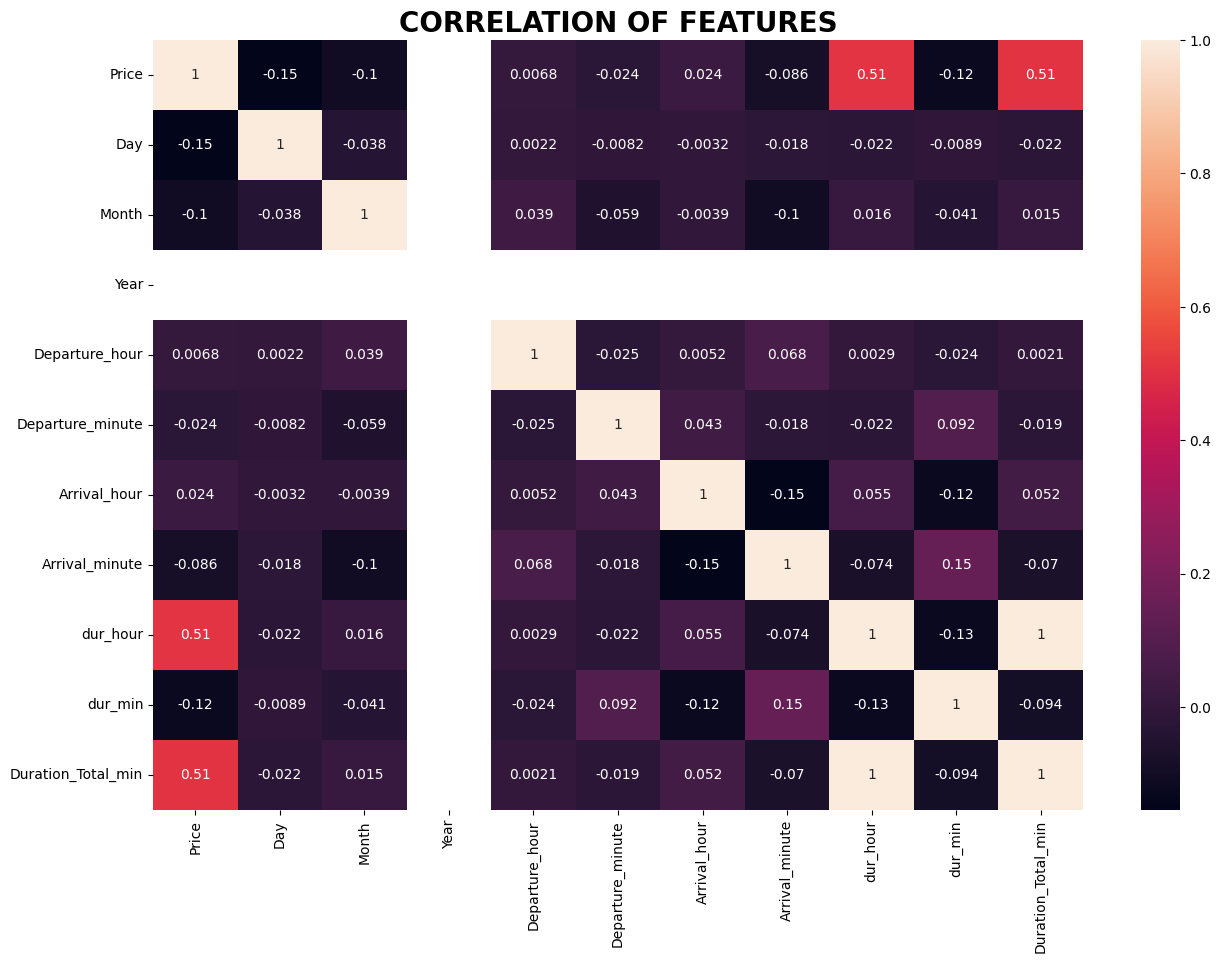

In [754]:
plt.figure(figsize=(15,10))
sns.heatmap(df.select_dtypes("number").corr(),annot=True) # prince correlation with the all the numerical values
plt.title("CORRELATION OF FEATURES",fontsize = 20,fontweight='bold')
plt.show()

In [755]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Day', 'Month', 'Year', 'Departure_hour',
       'Departure_minute', 'Arrival_hour', 'Arrival_minute', 'Flight_Takeoff',
       'dur_hour', 'dur_min', 'Duration_Total_min'],
      dtype='object')

In [756]:
df[["Duration_Total_min","Price"]].corr() # There is 0.50 linear correlation between them

,Duration_Total_min,Price
Duration_Total_min,1.00000,0.50648
Price,0.50648,1.00000


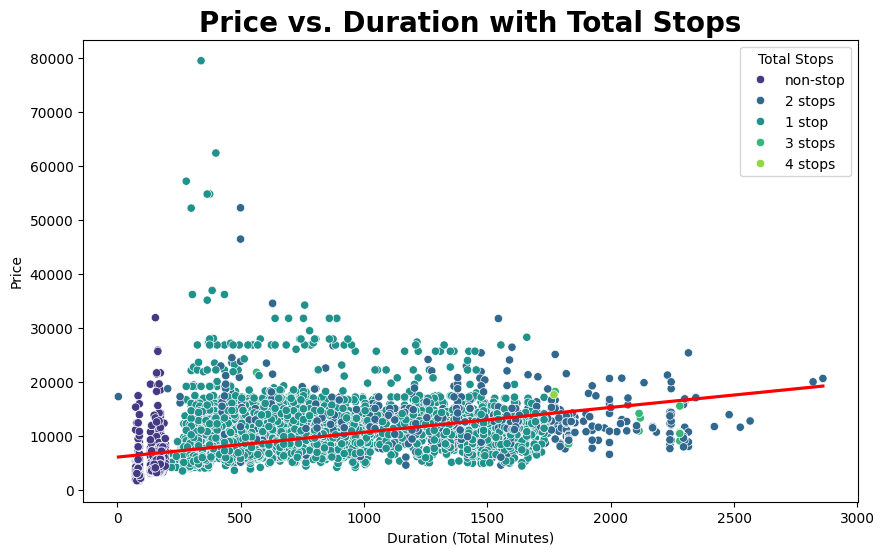

In [757]:
# Visual representaion As duration is increasing the price is also increasing 

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Duration_Total_min", y="Price", hue="Total_Stops", palette="viridis")

# Adding a regression line
sns.regplot(data=df, x="Duration_Total_min", y="Price", scatter=False, color="red")

plt.title("Price vs. Duration with Total Stops",fontsize=20,fontweight='bold')
plt.xlabel("Duration (Total Minutes)")
plt.ylabel("Price")
plt.legend(title="Total Stops")

plt.show()

# **BIVARIATE ANALYSIS**

In [758]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Month,Year,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,Flight_Takeoff,dur_hour,dur_min,Duration_Total_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-09-01 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,...,3,2019,22,20,1,10,Late Night,2,50,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-09-01 05:50:00,2024-09-01 13:15:00,7h 25m,2 stops,No info,...,5,2019,5,50,13,15,Early Morning,7,25,445


In [759]:
airlines = df["Airline"].value_counts().index
airlines

Index(['Jet Airways', 'IndiGo', 'Air India', 'Multiple carriers', 'SpiceJet',
       'Vistara', 'Air Asia', 'GoAir', 'Multiple carriers Premium economy',
       'Jet Airways Business', 'Vistara Premium economy', 'Trujet'],
      dtype='object', name='Airline')

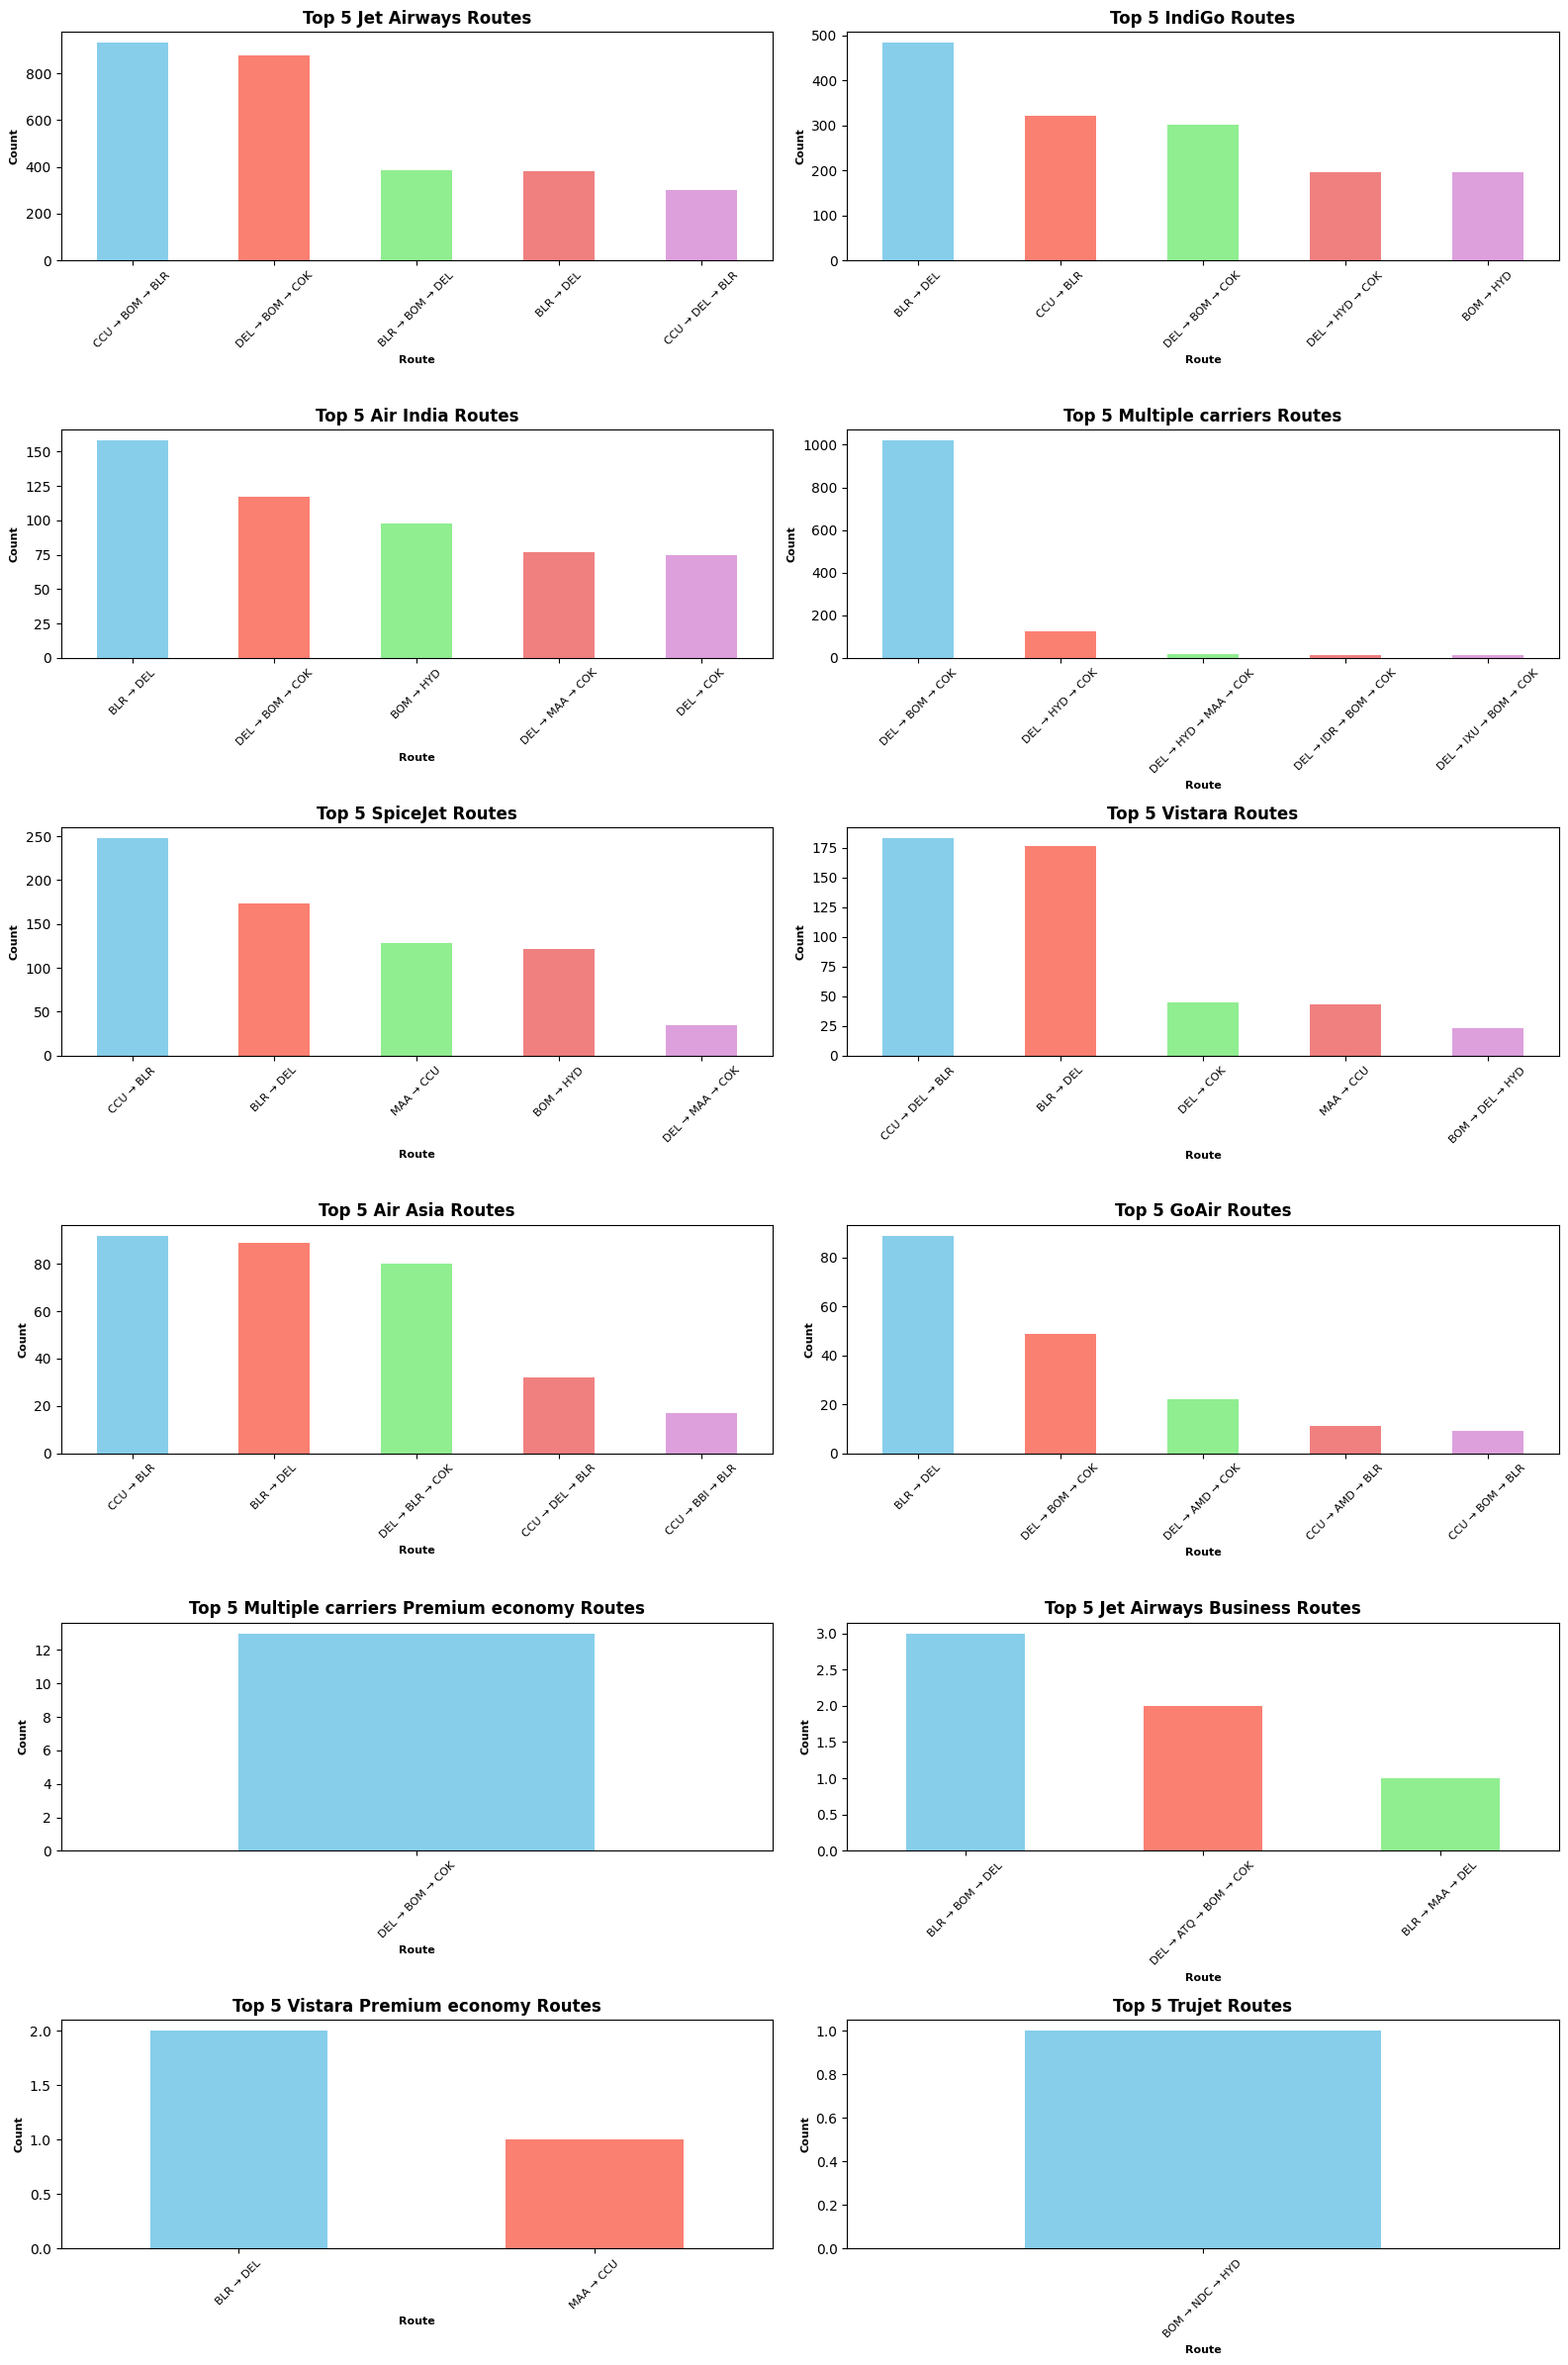

In [760]:
# Create a Graph that shows Top 5 Routes for every Airline

plt.figure(figsize=(16, 24))

# Define colors for the bar charts
colors = ['skyblue', 'salmon', 'lightgreen', 'lightcoral', 'plum', 'khaki', 'lightpink', 'peachpuff', 'lavender', 'gold']

# Loop through each airline to create subplots
for i, airline in enumerate(airlines, 1):

    airline_data = df[df["Airline"] == airline]["Route"]
    
    top_routes = airline_data.value_counts().head(5)
    
    plt.subplot(6, 2, i)
    
    # Plot the data
    top_routes.plot(kind="bar", color=colors[:len(top_routes)])
    
    # Set titles and labels
    plt.title(f"Top 5 {airline} Routes", fontsize=12, fontweight="bold")
    plt.ylabel("Count", fontsize=8, fontweight="bold")
    plt.xlabel("Route", fontsize=8, fontweight="bold")
    
    # Rotate x-axis labels for readability
    plt.xticks(rotation=45, fontsize=8)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

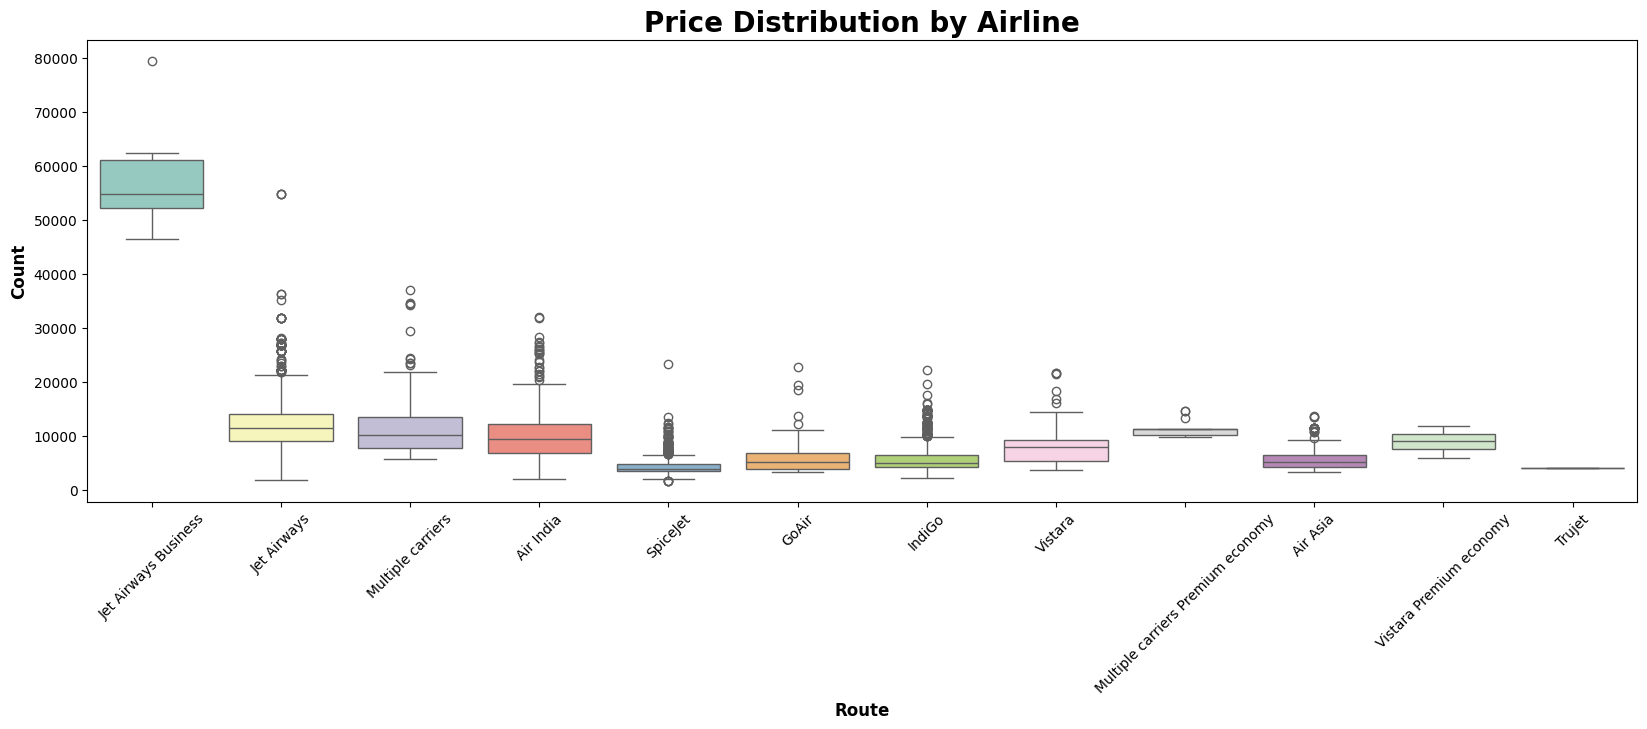

In [761]:
# Checking the Price distribution by Airline

plt.figure(figsize=(20,6))
sns.boxplot(df.sort_values("Price",ascending=False),y="Price",x ="Airline",palette="Set3")
plt.xticks(rotation = 45)
plt.title("Price Distribution by Airline",fontsize=20,fontweight="bold")
plt.ylabel("Count",fontsize = 12,fontweight = "bold")
plt.xlabel("Route",fontsize = 12,fontweight = "bold")
plt.show()

# **PRE-PROCESSING OF DATA**

In [762]:
df.sample()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Month,Year,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,Flight_Takeoff,dur_hour,dur_min,Duration_Total_min
193,Jet Airways,2019-06-27,Banglore,Delhi,BLR → DEL,2024-09-01 18:55:00,2024-09-01 22:00:00,3h 5m,non-stop,No info,...,6,2019,18,55,22,0,Evening,3,5,185


In [763]:
df.select_dtypes(include = "object").sample(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Flight_Takeoff
9071,Vistara,Kolkata,Banglore,CCU → DEL → BLR,27h 5m,1 stop,No info,Night
83,IndiGo,Delhi,Cochin,DEL → BOM → COK,9h 35m,1 stop,No info,Morning
3152,Jet Airways,Delhi,Cochin,DEL → BDQ → BOM → COK,34h,2 stops,No info,Evening


In [764]:
df = pd.get_dummies(df,columns = ["Source"], drop_first=True,dtype="int")

In [765]:
df

,Airline,Date_of_Journey,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,...,Arrival_hour,Arrival_minute,Flight_Takeoff,dur_hour,dur_min,Duration_Total_min,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,IndiGo,2019-03-24,New Delhi,BLR → DEL,2024-09-01 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,...,1,10,Late Night,2,50,170,0,0,0,0
1,Air India,2019-05-01,Banglore,CCU → IXR → BBI → BLR,2024-09-01 05:50:00,2024-09-01 13:15:00,7h 25m,2 stops,No info,7662,...,13,15,Early Morning,7,25,445,0,0,1,0
2,Jet Airways,2019-06-09,Cochin,DEL → LKO → BOM → COK,2024-09-01 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,...,4,25,Morning,19,0,1140,0,1,0,0
3,IndiGo,2019-05-12,Banglore,CCU → NAG → BLR,2024-09-01 18:05:00,2024-09-01 23:30:00,5h 25m,1 stop,No info,6218,...,23,30,Evening,5,25,325,0,0,1,0
4,IndiGo,2019-03-01,New Delhi,BLR → NAG → DEL,2024-09-01 16:50:00,2024-09-01 21:35:00,4h 45m,1 stop,No info,13302,...,21,35,Afternoon,4,45,285,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Banglore,CCU → BLR,2024-09-01 19:55:00,2024-09-01 22:25:00,2h 30m,non-stop,No info,4107,...,22,25,Evening,2,30,150,0,0,1,0
10679,Air India,2019-04-27,Banglore,CCU → BLR,2024-09-01 20:45:00,2024-09-01 23:20:00,2h 35m,non-stop,No info,4145,...,23,20,Night,2,35,155,0,0,1,0
10680,Jet Airways,2019-04-27,Delhi,BLR → DEL,2024-09-01 08:20:00,2024-09-01 11:20:00,3h,non-stop,No info,7229,...,11,20,Morning,3,0,180,0,0,0,0
10681,Vistara,2019-03-01,New Delhi,BLR → DEL,2024-09-01 11:30:00,2024-09-01 14:10:00,2h 40m,non-stop,No info,12648,...,14,10,Morning,2,40,160,0,0,0,0


In [766]:
df["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [767]:
airlines = df.groupby(["Airline"])["Price"].mean().sort_values().index
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [768]:
dict_airline = {}
for airline, num in enumerate(airlines,0):
    dict_airline[num] = airline


In [769]:
df["Airline"] = df["Airline"].map(dict_airline)

In [770]:
df["Destination"].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [771]:
df["Destination"] = df["Destination"].str.replace('New Delhi','Delhi')

In [772]:
df["Destination"].unique()
destination = df.groupby("Destination")["Price"].mean().sort_values().index
dict_destination = {value:key for key, value in enumerate(destination,0)}
df["Destination"] = df["Destination"].map(dict_destination)

In [773]:
df["Total_Stops"].unique()


array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [774]:
stop = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
df["Total_Stops"] = df["Total_Stops"].map(stop)

In [775]:
df.head(2)

,Airline,Date_of_Journey,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,...,Arrival_hour,Arrival_minute,Flight_Takeoff,dur_hour,dur_min,Duration_Total_min,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,3,2019-03-24,2,BLR → DEL,2024-09-01 22:20:00,2024-03-22 01:10:00,2h 50m,0,No info,3897,...,1,10,Late Night,2,50,170,0,0,0,0
1,7,2019-05-01,3,CCU → IXR → BBI → BLR,2024-09-01 05:50:00,2024-09-01 13:15:00,7h 25m,2,No info,7662,...,13,15,Early Morning,7,25,445,0,0,1,0


In [776]:
# In Additional_Info stop feature have more the 75% of data that have No_infomation so that feature not required
df["Additional_Info"].value_counts()/len(df)*100  

Additional_Info
No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
1 Short layover                  0.009362
Red-eye flight                   0.009362
2 Long layover                   0.009362
Name: count, dtype: float64

In [777]:
df.head(2)

,Airline,Date_of_Journey,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,...,Arrival_hour,Arrival_minute,Flight_Takeoff,dur_hour,dur_min,Duration_Total_min,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,3,2019-03-24,2,BLR → DEL,2024-09-01 22:20:00,2024-03-22 01:10:00,2h 50m,0,No info,3897,...,1,10,Late Night,2,50,170,0,0,0,0
1,7,2019-05-01,3,CCU → IXR → BBI → BLR,2024-09-01 05:50:00,2024-09-01 13:15:00,7h 25m,2,No info,7662,...,13,15,Early Morning,7,25,445,0,0,1,0


In [778]:
df.Year.unique()

array([2019])

In [779]:
## Removing the Unneccessary features from the data ##

# Date_of_Journey - As we extracted the important features from this column like day, month and year
# Source - We have done one hot encoding to this feature
# Route - Total stop also share the same information as Route like if Route is from BLR → DEL that means it has no stops
# Dep_Time -  We extracted the features from this feature like Hour, minutes
# Arrival_Time - We extracted the features from this feature like Hour, minute
# Duration (dur_hour, dur_min)- We extracted the features from this feature like total number of minutes duration of travel
# Additional_Info - # In Additional_Info stop feature have more the 75% of data that have No_infomation so that feature not required
# Year - There is no variance in this feature 2019 is constant number here that does not make any sense in our ML model

In [780]:
df = df.drop(columns = ["Date_of_Journey","Route","Dep_Time","Arrival_Time","Duration","Additional_Info","Year","Flight_Takeoff","Duration_Total_min"])

In [781]:
df.head()

,Airline,Destination,Total_Stops,Price,Day,Month,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,dur_hour,dur_min,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,3,2,0,3897,24,3,22,20,1,10,2,50,0,0,0,0
1,7,3,2,7662,1,5,5,50,13,15,7,25,0,0,1,0
2,10,4,2,13882,9,6,9,25,4,25,19,0,0,1,0,0
3,3,3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0
4,3,2,1,13302,1,3,16,50,21,35,4,45,0,0,0,0


In [782]:
def outlier_check(data,col):
        fig, (ax1, ax2, ax3) = plt.subplots(3, 1)

        # Histogram with KDE
        sns.histplot(data[col], ax=ax1, kde=True)
        ax1.set_title(f'Histogram with KDE for {col}',fontweight='bold')

        # Boxplot
        sns.boxplot(x=data[col], ax=ax2)
        ax2.set_title(f'Boxplot for {col}',fontweight='bold')

        # Histogram without KDE
        sns.histplot(data[col], ax=ax3, kde=False)
        ax3.set_title(f'Histogram without KDE for {col}',fontweight='bold')

        plt.tight_layout()
        plt.show()

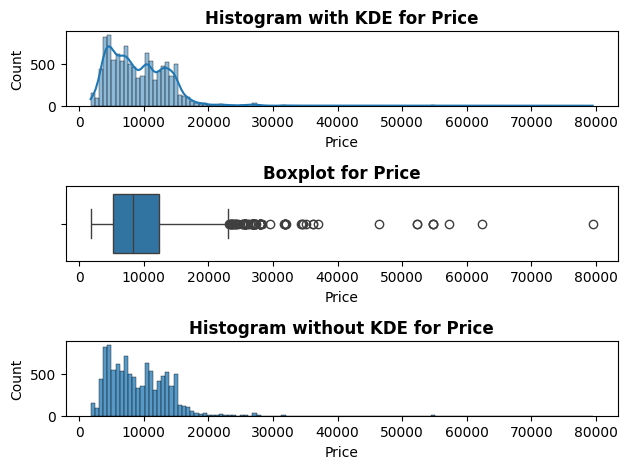

In [783]:
outlier_check(df,"Price")

In [784]:
# Removing outliars
Q1 = df["Price"].describe()["25%"]
Q3 = df["Price"].describe()["75%"]
IQR = Q3-Q1

ul = Q3 + 1.5*IQR
ll = Q1 - 1.5*IQR

df["Price"] = df["Price"].clip(ll,ul)

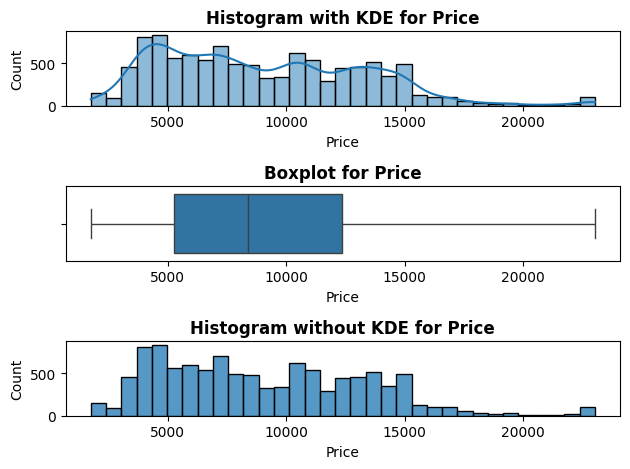

In [785]:
outlier_check(df,"Price")
plt.show()

# **Feture Selection**

In [786]:
X = df.drop(columns="Price")
y = df["Price"]

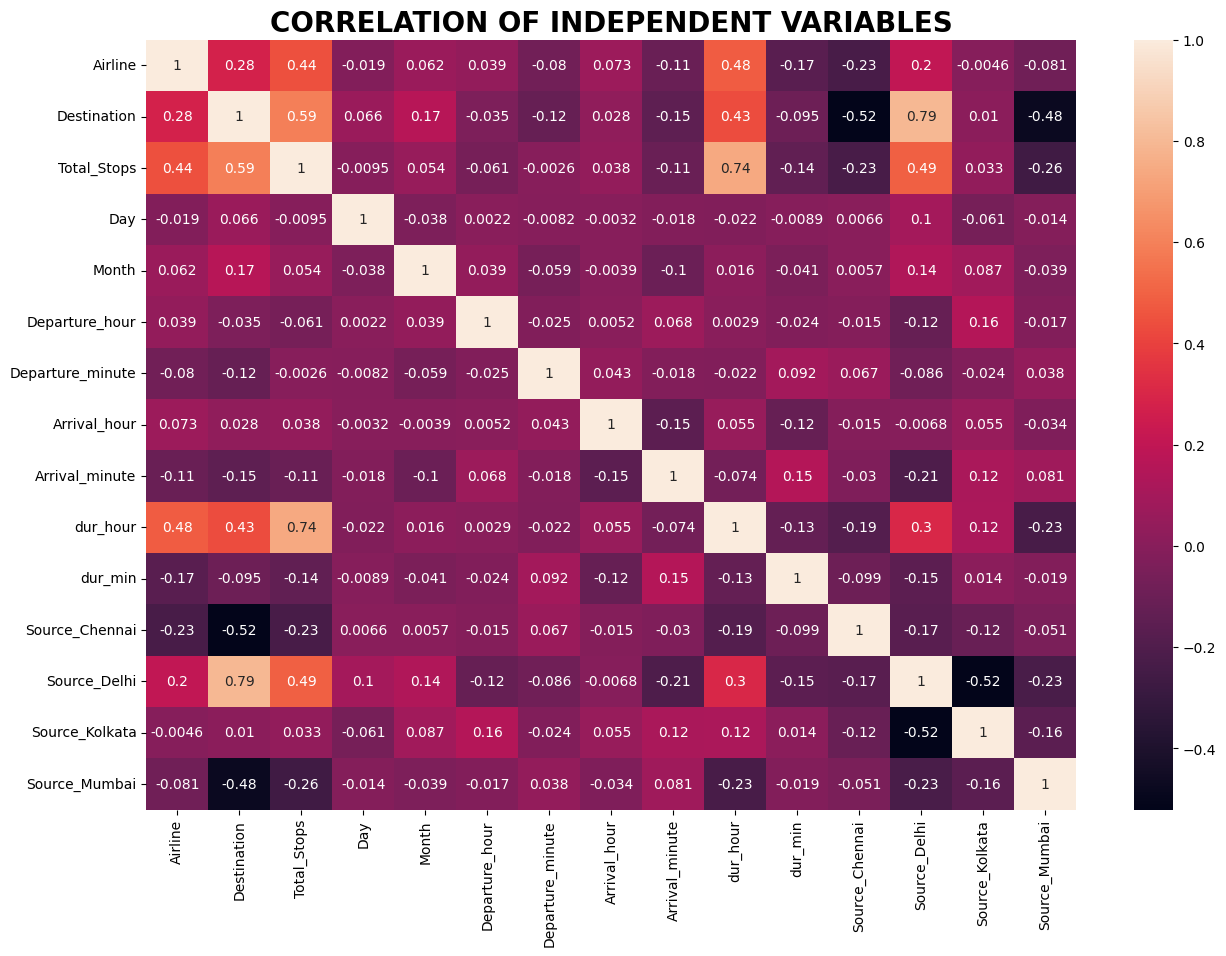

In [787]:
#Checking the Multicolinearity between the independent variables
plt.figure(figsize = (15,10))
sns.heatmap(X.corr(),annot=True)
plt.title("CORRELATION OF INDEPENDENT VARIABLES",fontsize=20,fontweight="bold")
plt.show()

In [788]:
X.corr()*100>95

,Airline,Destination,Total_Stops,Day,Month,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,dur_hour,dur_min,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
Airline,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Destination,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
Total_Stops,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
Day,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
Month,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
Departure_hour,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
Departure_minute,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
Arrival_hour,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
Arrival_minute,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
dur_hour,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [789]:
from sklearn.feature_selection import mutual_info_regression

In [790]:
imp = mutual_info_regression(X,y)
imp

array([1.31901191, 1.05552504, 0.78084031, 0.36996824, 0.62680029,
       0.91977486, 0.76026541, 1.14046274, 0.8961289 , 1.11918838,
       0.67491176, 0.13642092, 0.52028321, 0.44910934, 0.19625251])

In [791]:
important_df = pd.DataFrame(imp, columns=["Score"],index=X.columns)

In [792]:
# All feature have importance in model training 
important_df.sort_values(by="Score",ascending=False)

,Score
Airline,1.319012
Arrival_hour,1.140463
dur_hour,1.119188
Destination,1.055525
Departure_hour,0.919775
Arrival_minute,0.896129
Total_Stops,0.780840
Departure_minute,0.760265
dur_min,0.674912
Month,0.626800


In [793]:
df.head(1)

,Airline,Destination,Total_Stops,Price,Day,Month,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,dur_hour,dur_min,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,3,2,0,3897,24,3,22,20,1,10,2,50,0,0,0,0


In [794]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **MODEL SELECTION**

In [795]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [796]:
ra = RandomForestRegressor()
gr = GradientBoostingRegressor()
ad = AdaBoostRegressor()
xg = XGBRegressor()
lr = LinearRegression()
de = DecisionTreeRegressor()
la = Lasso()
ri = Ridge()
sv = SVR()
kn = KNeighborsRegressor()

lst = [ra,gr,ad,xg,lr,de,la,ri,sv,kn]

Model_Name = RandomForestRegressor,  RMSE = 1766.1427734806523,  R2_Score = 0.810702590421313, Adjusted_R2_Score = 0.8093638534370224


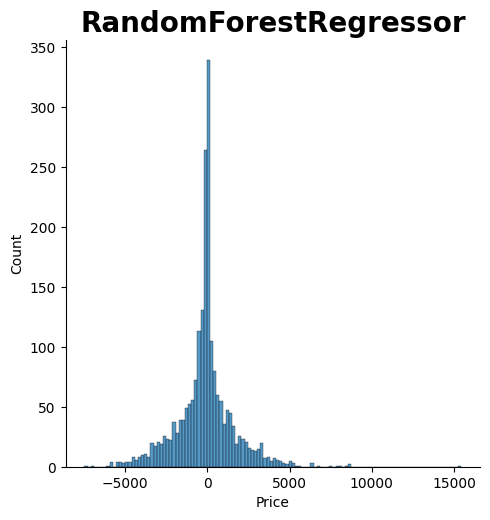

Model_Name = GradientBoostingRegressor,  RMSE = 2063.1320862022953,  R2_Score = 0.6803348727349822, Adjusted_R2_Score = 0.6780741575492324


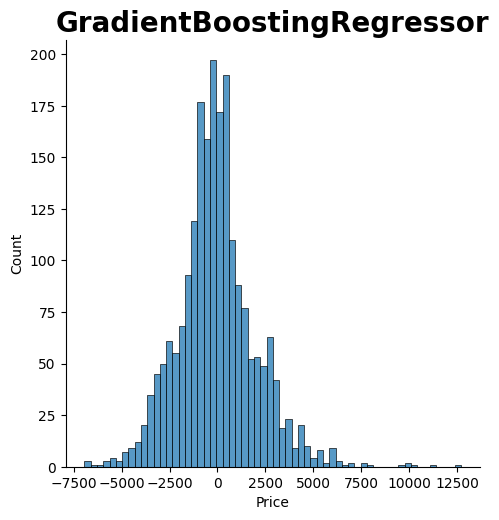

Model_Name = AdaBoostRegressor,  RMSE = 2559.745074373152,  R2_Score = 0.3481455977998884, Adjusted_R2_Score = 0.3435355949554746


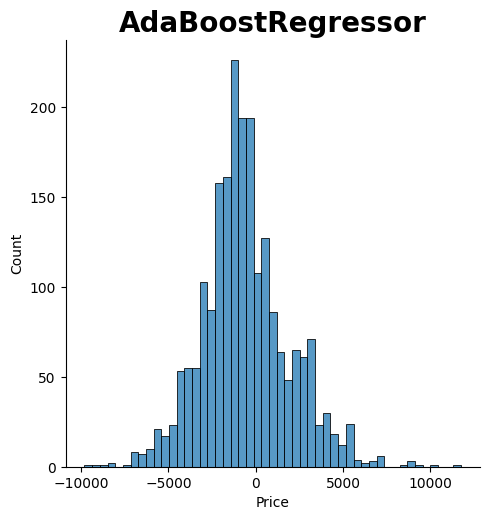

Model_Name = XGBRegressor,  RMSE = 1626.3838744402146,  R2_Score = 0.8363690376281738, Adjusted_R2_Score = 0.8352118172436489


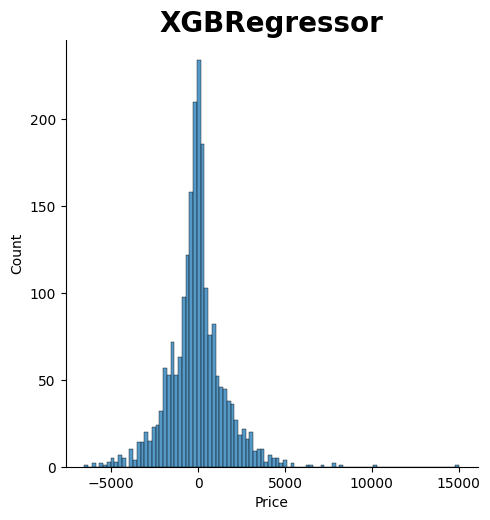

Model_Name = LinearRegression,  RMSE = 2744.698415487446,  R2_Score = 0.34830663817595586, Adjusted_R2_Score = 0.3436977742309485


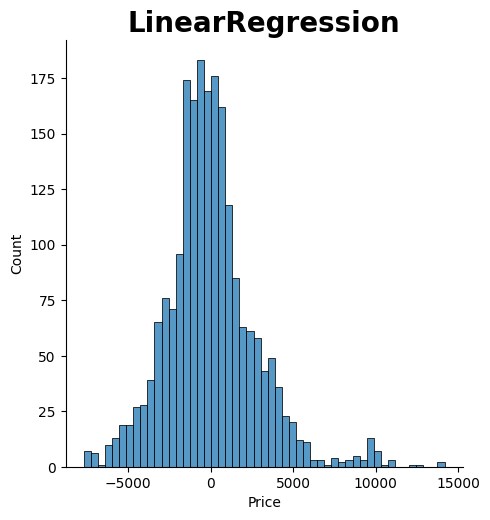

Model_Name = DecisionTreeRegressor,  RMSE = 2233.21967397514,  R2_Score = 0.7334068396432676, Adjusted_R2_Score = 0.7315214566138706


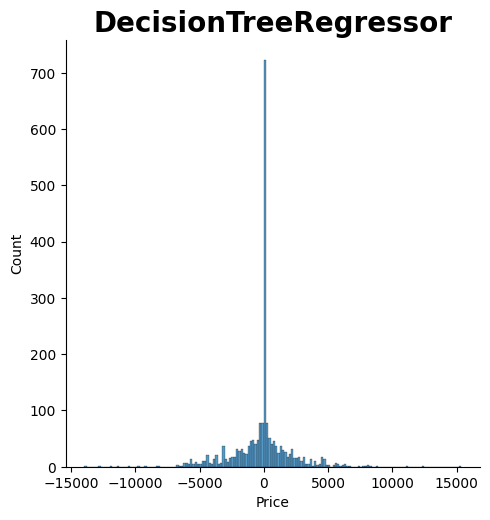

Model_Name = Lasso,  RMSE = 2744.635584900153,  R2_Score = 0.3474595261052249, Adjusted_R2_Score = 0.34284467126862816


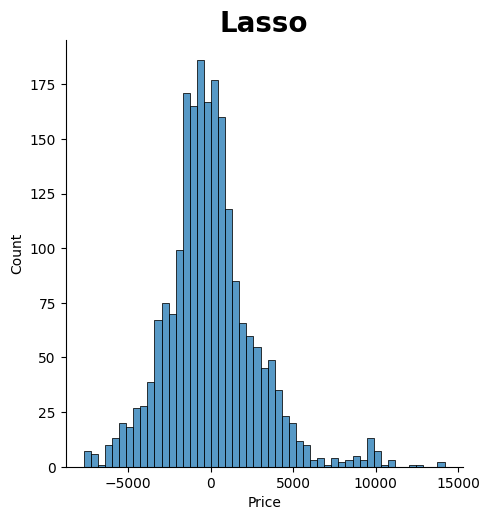

Model_Name = Ridge,  RMSE = 2744.7176253262555,  R2_Score = 0.3481432503575539, Adjusted_R2_Score = 0.3435332309117092


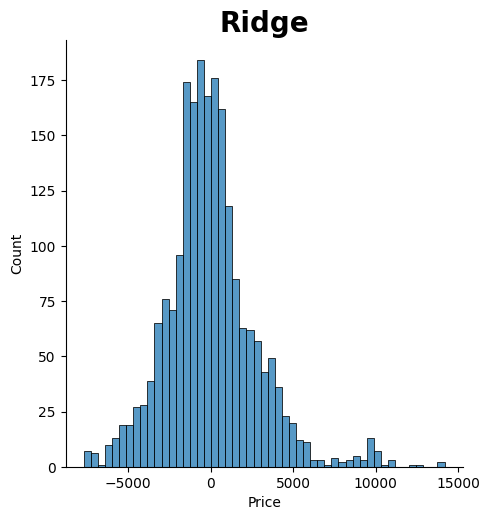

Model_Name = SVR,  RMSE = 4290.124354477762,  R2_Score = -541.3547347188464, Adjusted_R2_Score = -545.1903410464197


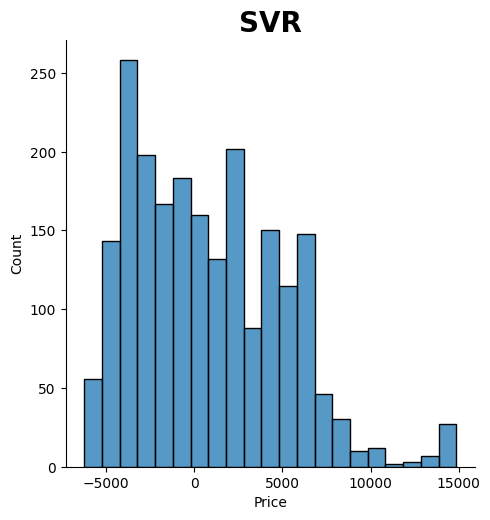

Model_Name = KNeighborsRegressor,  RMSE = 2526.5643853608576,  R2_Score = 0.521753564161803, Adjusted_R2_Score = 0.5183713404288595


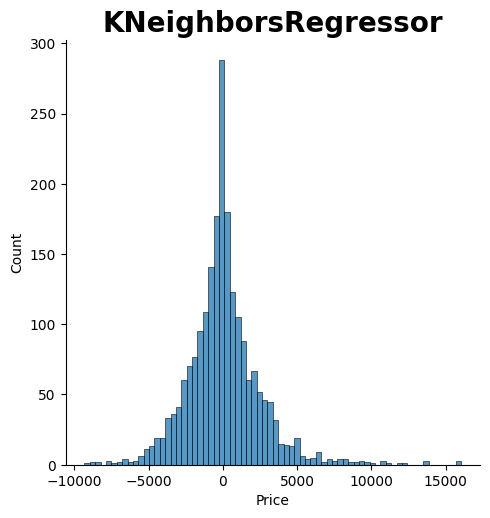

In [797]:
model_name = ["RandomForestRegressor","GradientBoostingRegressor","AdaBoostRegressor","XGBRegressor","LinearRegression","DecisionTreeRegressor","Lasso","Ridge","SVR","KNeighborsRegressor"]
for name,i in zip(model_name,lst):
    i.fit(X_train,y_train)
    y_pred = i.predict(X_test)
    RMSE = np.sqrt(mean_squared_error(y_pred,y_test))
    n = len(y_test)
    p = 15
    r2 = r2_score(y_pred,y_test)
    adjusted_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)
    print(f"Model_Name = {name},  RMSE = {RMSE},  R2_Score = {r2}, Adjusted_R2_Score = {adjusted_r2}")
    print((sns.displot(y_test-y_pred)))
    
    plt.title(name,fontsize = 20,fontweight='bold')
    plt.show()

In [798]:
xg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [799]:
for j,i in enumerate(X.columns):
    print(j,i)

0 Airline
1 Destination
2 Total_Stops
3 Day
4 Month
5 Departure_hour
6 Departure_minute
7 Arrival_hour
8 Arrival_minute
9 dur_hour
10 dur_min
11 Source_Chennai
12 Source_Delhi
13 Source_Kolkata
14 Source_Mumbai


Feature: 0, Score: 573.72313
Feature: 1, Score: 169.07124
Feature: 2, Score: 2725.06783
Feature: 3, Score: -70.56212
Feature: 4, Score: -569.50901
Feature: 5, Score: 15.30345
Feature: 6, Score: -1.31179
Feature: 7, Score: -15.19140
Feature: 8, Score: -2.10731
Feature: 9, Score: -1.48995
Feature: 10, Score: -2.68478
Feature: 11, Score: 575.16052
Feature: 12, Score: -75.50830
Feature: 13, Score: -36.28173
Feature: 14, Score: -1506.69060


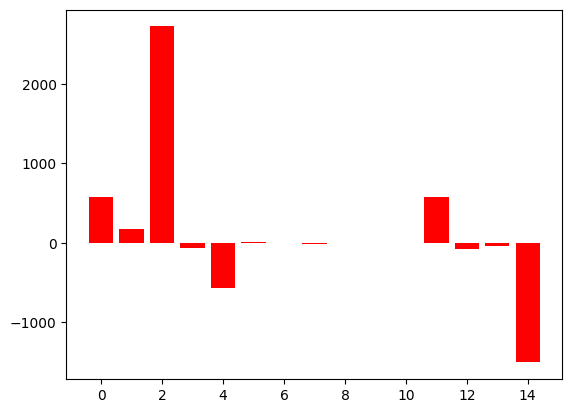

In [800]:
importance = ri.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
barr = plt.bar([x for x in range(len(importance))], importance,color = 'red')
plt.show()

In [801]:
la.coef_

array([ 5.73120858e+02,  1.24758090e+02,  2.72369747e+03, -7.04889062e+01,
       -5.67754724e+02,  1.52422723e+01, -1.31179289e+00, -1.51801672e+01,
       -2.13932734e+00, -1.17733026e+00, -2.75888246e+00,  4.51503743e+02,
        2.45029045e+00, -0.00000000e+00, -1.54435110e+03])

Feature: 0, Score: 573.12086
Feature: 1, Score: 124.75809
Feature: 2, Score: 2723.69747
Feature: 3, Score: -70.48891
Feature: 4, Score: -567.75472
Feature: 5, Score: 15.24227
Feature: 6, Score: -1.31179
Feature: 7, Score: -15.18017
Feature: 8, Score: -2.13933
Feature: 9, Score: -1.17733
Feature: 10, Score: -2.75888
Feature: 11, Score: 451.50374
Feature: 12, Score: 2.45029
Feature: 13, Score: -0.00000
Feature: 14, Score: -1544.35110


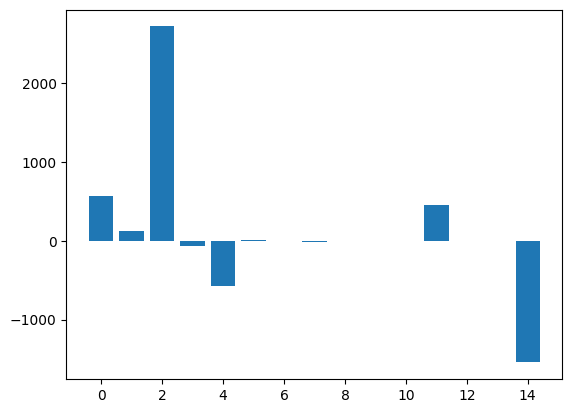

In [802]:
importance = la.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [803]:
df.sample()

,Airline,Destination,Total_Stops,Price,Day,Month,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,dur_hour,dur_min,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
4334,3,0,0,3540,6,6,5,15,7,40,2,25,1,0,0,0


In [804]:
# Based on the L1 and L2 Regularization I have Removed certain featurea that are less important 
X_new = df.drop(columns = ["Price","Departure_hour","Departure_minute","Arrival_hour","Arrival_minute","dur_hour","dur_min"])
y_new = df["Price"]

In [805]:
X_new_train,X_new_test,y_new_train,y_new_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

In [806]:
# I used ExhaustiveFeatureSelector to get the best features and the best parameters 
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

exh = EFS(xg, max_features=9, scoring='r2',cv = 5,print_progress=True)

In [807]:
sel = exh.fit(X_new_train, y_new_train)

Features: 511/511

In [808]:
sel.best_score_

0.797630500793457

In [809]:
# That also reduce the 2 more features that are unimportant and we are still getting the accuracy of 81.78% 
sel.best_feature_names_

('Airline', 'Destination', 'Total_Stops', 'Day', 'Month', 'Source_Kolkata')

In [810]:
model_name = ["RandomForestRegressor","GradientBoostingRegressor","AdaBoostRegressor","XGBRegressor","LinearRegression","DecisionTreeRegressor","Lasso","Ridge","SVR","KNeighborsRegressor"]
for name,i in zip(model_name,lst):
    i.fit(X_new_train,y_new_train)
    y_new_pred = i.predict(X_new_test)
    RMSE = np.sqrt(mean_squared_error(y_new_pred,y_new_test))
    n = len(y_new_test)
    p = 15
    r2 = r2_score(y_new_pred,y_new_test)
    adjusted_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)
    print(f"Model_Name = {name},  RMSE = {RMSE},  R2_Score = {r2}, Adjusted_R2_Score = {adjusted_r2}")

    

Model_Name = RandomForestRegressor,  RMSE = 1942.528553999288,  R2_Score = 0.757775712196026, Adjusted_R2_Score = 0.7560626691422496
Model_Name = GradientBoostingRegressor,  RMSE = 2063.263705490911,  R2_Score = 0.6966410338776987, Adjusted_R2_Score = 0.6944956380776824
Model_Name = AdaBoostRegressor,  RMSE = 2604.149562271346,  R2_Score = 0.3766284901221636, Adjusted_R2_Score = 0.3722199221598026
Model_Name = XGBRegressor,  RMSE = 1946.3558923638852,  R2_Score = 0.7583190202713013, Adjusted_R2_Score = 0.7566098195660064
Model_Name = LinearRegression,  RMSE = 2748.4275202335925,  R2_Score = 0.3448367913602318, Adjusted_R2_Score = 0.3402033881873905
Model_Name = DecisionTreeRegressor,  RMSE = 1987.6200806031693,  R2_Score = 0.7507493000308261, Adjusted_R2_Score = 0.748986565236136
Model_Name = Lasso,  RMSE = 2748.294105861639,  R2_Score = 0.3440345807412585, Adjusted_R2_Score = 0.3393955042259915
Model_Name = Ridge,  RMSE = 2748.441148169024,  R2_Score = 0.34467179675520554, Adjusted_R2

# **CROSS VALIDATION OF XGB MODEL**

In [811]:
xg.fit(X_new_train,y_new_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [812]:
y_pred_new = xg.predict(X_new_test)

In [813]:
r2_score(y_new_test,y_pred_new)

0.7969229221343994

In [814]:
from sklearn.model_selection import cross_val_score

In [815]:
cv = cross_val_score(XGBRegressor(),X_new_train,y_new_train,cv=5)

In [816]:
np.mean(cv)

0.7969794750213623

In [817]:
xb = XGBRegressor()

In [818]:
xb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [819]:
y_pred = xb.predict(X_test)

In [820]:
xb.score(X_train,y_train)

0.928131103515625

In [821]:
def mape(y_test,y_pred):
    y_test,y_pred = np.array(y_test),np.array(y_pred)
    return np.mean(np.abs(y_test-y_pred)/y_test)*100

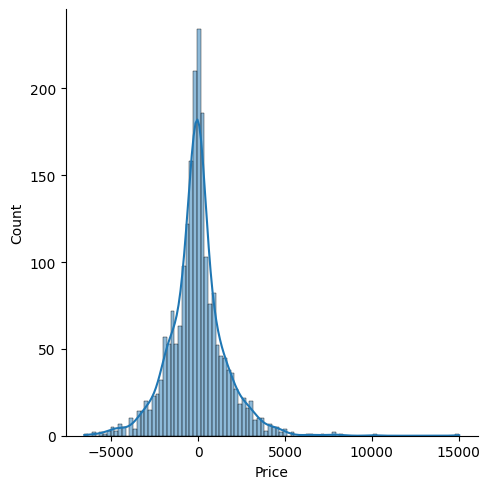

In [822]:
sns.displot(y_test-y_pred,kde = True)

In [823]:
mape(y_test,y_pred)

12.724466659014281

In [824]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
scaler = StandardScaler()

In [825]:
print(cross_val_score(Pipeline([('regressor', xb)]),X_train,y_train,cv =5).mean())

0.8412490010261535


# **HYPER-PARAMETER OPTIMIZATION**

In [826]:
from sklearn.model_selection import GridSearchCV

In [827]:
xg = XGBRegressor(random_state=42)

In [828]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],        # Number of boosting rounds
    'learning_rate': [0.01, 0.05, 0.1],     # Step size shrinkage used in updates
    'max_depth': [3, 5, 7],                 # Maximum depth of a tree
    'subsample': [0.6, 0.8, 1.0],           # Subsample ratio of the training instances
    'colsample_bytree': [0.6, 0.8, 1.0],    # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.2],                 # Minimum loss reduction required to make a further partition
    'reg_alpha': [0, 0.01, 0.1],            # L1 regularization term on weights
    'reg_lambda': [0.1, 1, 10]              # L2 regularization term on weights
}

In [829]:
grid_search = GridSearchCV(
    estimator=xg,
    param_grid=param_grid,
    scoring='r2',           # Use R² as the scoring metric
    cv=5,                   # 5-fold cross-validation
    n_jobs=-1,              # Use all available cores
    verbose=1               # Print progress messages to stdout
)

In [830]:
# Fit the model to the training data # It will take around 30 min to select the best parameters
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6561 candidates, totalling 32805 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'reg_alpha': [0, 0.01, 0.1],
                         'reg_lambda': [0.1, 1, 10],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='r2', verbose=1)

In [831]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best R² Score:", best_score)

Best Hyperparameters: {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 300, 'reg_alpha': 0.1, 'reg_lambda': 1, 'subsample': 1.0}
Best R² Score: 0.8553231120109558


# **THANK YOU**